# Введение в нейронные сети

## Урок 4. Сверточные нейронные сети

In [2]:
!pip install opencv-python

In [3]:
!pip install imblearn

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler

from tqdm import tqdm

import cv2

In [5]:
data = pd.read_csv('train.csv')
data.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [6]:
data.shape

(7095, 3)

### Разведочный анализ данных

In [7]:
data["ClassId"].value_counts()

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

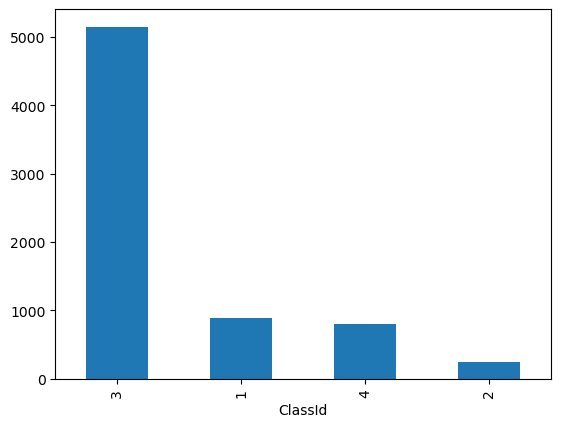

In [8]:
data["ClassId"].value_counts().plot(kind = 'bar');

In [9]:
l1=[]
l2=[]
for img, ClassId, EncodedPixels in tqdm(data.values):
    try:
        image = cv2.imread("train_images/{}".format(img), cv2.IMREAD_COLOR)
        image = cv2.resize(image,(120,120))
        l1.append(image)
        l2.append(ClassId)
    except:
        continue

100%|██████████| 7095/7095 [00:04<00:00, 1571.81it/s] 


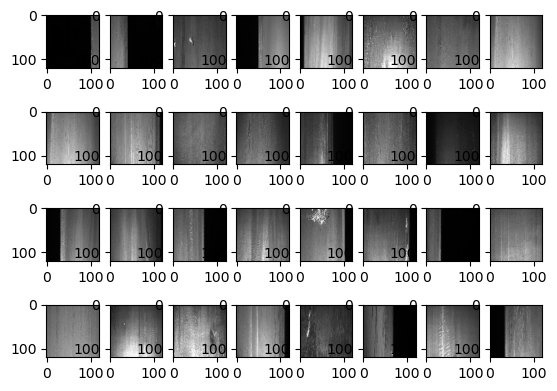

In [10]:
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(l1[i])
plt.show()

In [11]:
X = np.array(l1)
X = X / 255

encoder = LabelEncoder()
y = encoder.fit_transform(l2)
y = np.array(y)

In [12]:
X.shape, y.shape

((351, 120, 120, 3), (351,))

### Борьба с дибалансом

In [13]:
reshaped_X = X.reshape(X.shape[0], -1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X, y)
X = X.reshape(-1, 120, 120, 3)
X.shape

(984, 120, 120, 3)

In [14]:
y = to_categorical(y)
y.shape

(984, 4)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (787, 120, 120, 3)
x_test размер: (197, 120, 120, 3)
y_train размер: (787, 4)
y_test размер: (197, 4)


### Построение нейронной сети в 3 слоя

In [16]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"))
model.add(Flatten())
model.add(Dense(4, activation="softmax"))

c:\Users\shive\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [18]:
erly_stoping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [19]:
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    batch_size=128,
                    verbose=1, 
                    callbacks=[erly_stoping])

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3054 - loss: 7.5577 - val_accuracy: 0.2690 - val_loss: 7.1754
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3757 - loss: 5.2184 - val_accuracy: 0.4822 - val_loss: 1.1454
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.4336 - loss: 1.5591 - val_accuracy: 0.5787 - val_loss: 0.8667
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6315 - loss: 0.8852 - val_accuracy: 0.6853 - val_loss: 0.7114
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7328 - loss: 0.6577 - val_accuracy: 0.7766 - val_loss: 0.5621
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7961 - loss: 0.5059 - val_accuracy: 0.8325 - val_loss: 0.5160
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8839 - loss: 0.3720 - val_accuracy: 0.8122 - val_loss: 0.5333
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8701 - loss: 0.3343 - val_accuracy: 0.7817 - val_loss: 0.4739


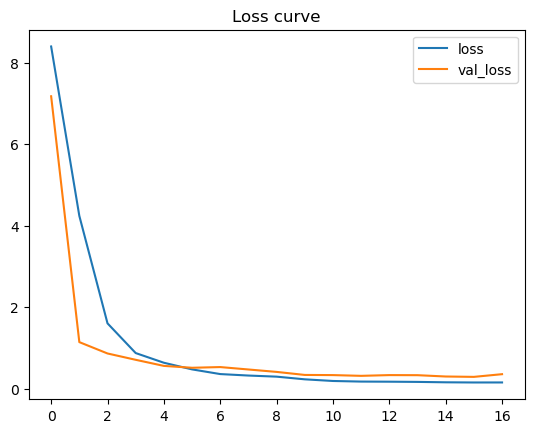

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve');

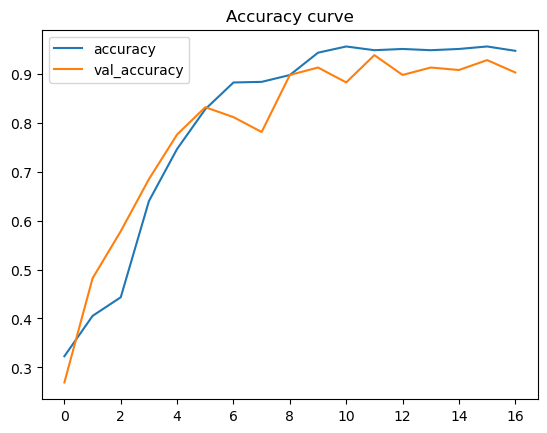

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve');

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9478 - loss: 0.3098 


(0.3179902136325836, 0.9390863180160522)

In [23]:
y_pred = np.argmax(model.predict(X_test), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


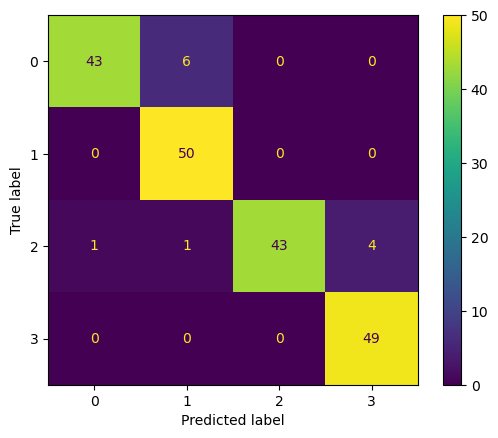

In [24]:
ConfusionMatrixDisplay.from_predictions(np.argmax(y_test, axis=1), y_pred);

### Построение нейронной сети в 13 слоев

In [63]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(4,activation="softmax"))

c:\Users\shive\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [64]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [66]:
history = model.fit(X_train,
                    y_train,
                    batch_size=8,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3199 - loss: 1.3386 - val_accuracy: 0.5228 - val_loss: 1.0464
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4826 - loss: 1.0607 - val_accuracy: 0.5279 - val_loss: 0.9563
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5635 - loss: 0.9390 - val_accuracy: 0.5990 - val_loss: 0.9456
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5718 - loss: 0.9321 - val_accuracy: 0.6091 - val_loss: 0.8600
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6523 - loss: 0.7896 - val_accuracy: 0.6904 - val_loss: 0.7849
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6626 - loss: 0.7552 - val_accuracy: 0.6701 - val_loss: 0.6778
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7349 - loss: 0.6652 - val_accuracy: 0.7259 - val_loss: 0.6327
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7655 - loss: 0.5829 - val_accuracy: 0.7563 - val_loss

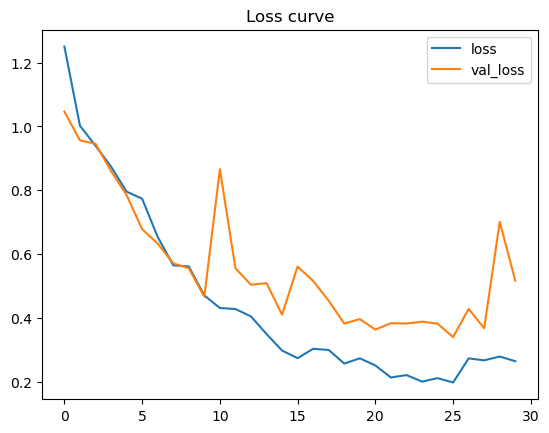

In [67]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve');

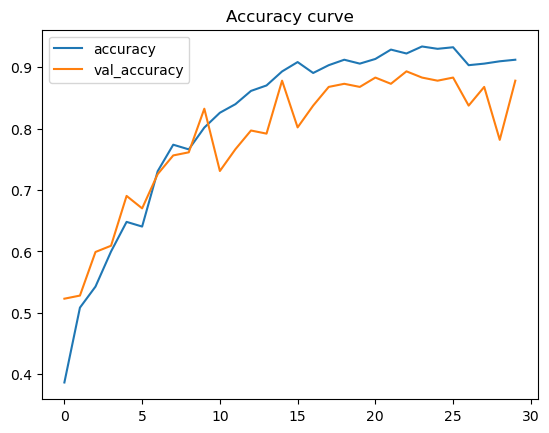

In [68]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve');

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8956 - loss: 0.3266


(0.33942699432373047, 0.8832487463951111)

In [70]:
y_pred = np.argmax(model.predict(X_test), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


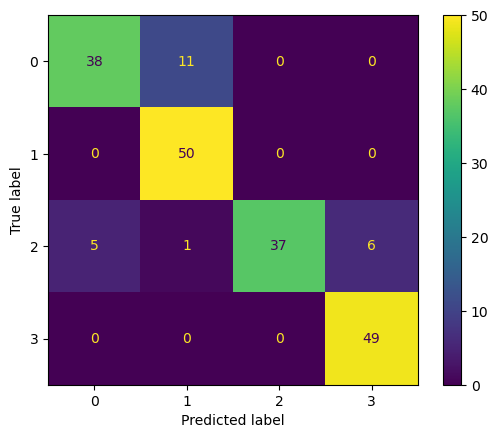

In [71]:
ConfusionMatrixDisplay.from_predictions(np.argmax(y_test, axis=1), y_pred);

В нейронной сети из 13 слоев было убрано 2 слоя Dropout, изменено количество фильтров и нейронов в некоторых скрытых слоях.  
Хороший прирост accuracy дало уменьшение batch_size и увеличение эпох обучения.  
Лучший результат: accuracy = 0.8956

**Вывод**

**Лучший результат показала трехслойная нейронная сеть: accuracy = 0.8956**